<a href="https://colab.research.google.com/github/HimaRaniMathews/SPARK-FOUNDATION-GRIPNOVEMBER21/blob/main/TASK6/PREDICTION_USING_DECISION_TREE_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HIMA RANI MATHEWS**

---



**GRIP @ THE SPARKS FOUNDATION**

**TASK - 6 PREDICTION USING DECISION TREE ALGORITHM**

---



**Importing all libraries**

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import seaborn as sns

**Importing Dataset**

In [76]:
df = pd.read_csv('/content/drive/MyDrive/Spark Foundation/TASK6/Iris.csv')  
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Exploring the dataset**

In [77]:
#checking for null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [78]:
df.shape

(150, 6)

In [79]:
#Showing only target data (Dependent Variable)
y=df.Species
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [80]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [81]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

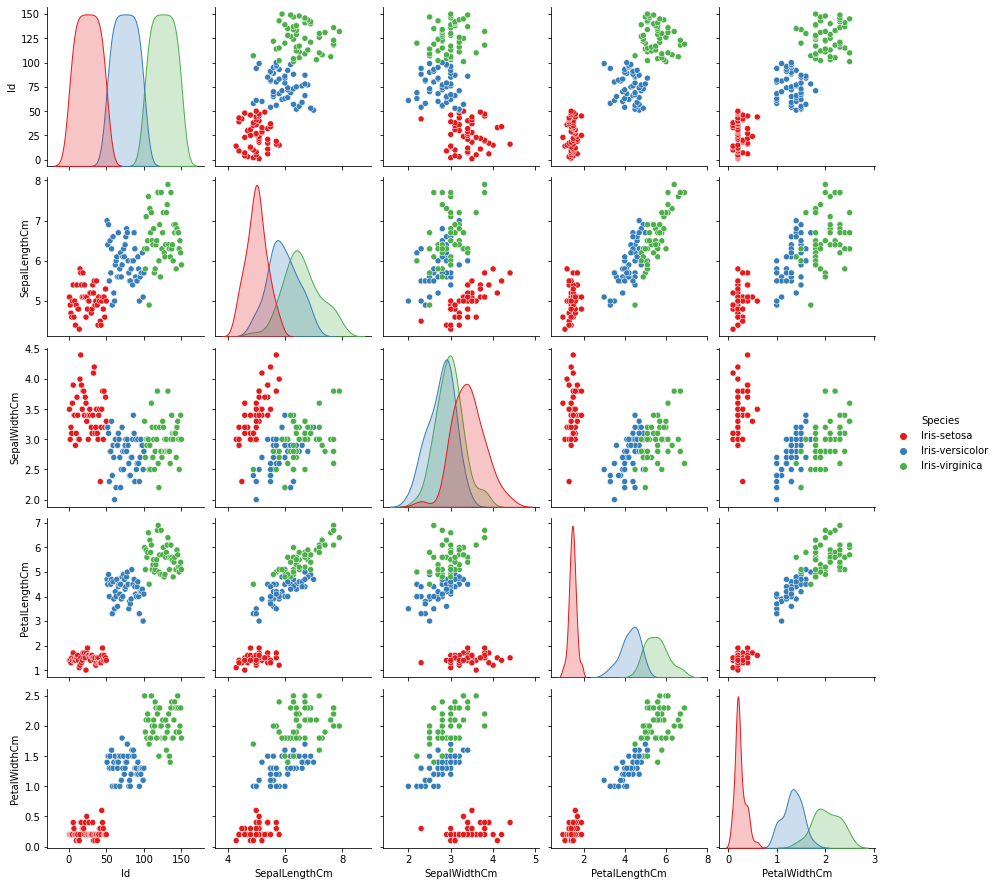

In [82]:
sns.pairplot(df,hue='Species',palette='Set1')

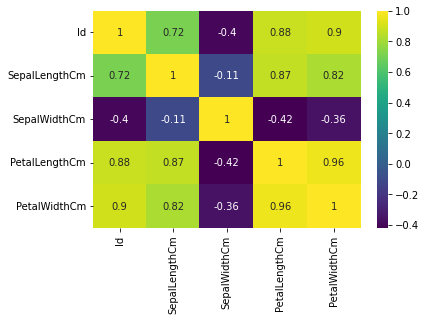

In [83]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**Splitting the Data**

In [84]:
from sklearn.model_selection import train_test_split
fc = [x for x in df.columns if x!="Species"]
x= df[fc]
y= df["Species"]
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X_train, X_test, y_train, y_test = train_test_split( df[cols],
                                                  df['Species'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

In [85]:
print('Shape of Traing data :',X_train.shape)
print('Shape of test data: ',X_test.shape)

Shape of Traing data : (120, 4)
Shape of test data:  (30, 4)


# **BUILDING THE MODEL**

**Decision Tree**

In [86]:
from sklearn.tree import DecisionTreeClassifier 
DTC=DecisionTreeClassifier ()
DTC.fit(X_train,y_train)
prediction=DTC.predict(X_test)
prediction
compare=pd.DataFrame({'Actual':y_test,'Prediction':prediction})
compare

,Actual,Prediction
72,Iris-versicolor,Iris-versicolor
112,Iris-virginica,Iris-virginica
132,Iris-virginica,Iris-virginica
88,Iris-versicolor,Iris-versicolor
37,Iris-setosa,Iris-setosa
138,Iris-virginica,Iris-versicolor
87,Iris-versicolor,Iris-versicolor
42,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
90,Iris-versicolor,Iris-versicolor


In [87]:
#Testing the accuracy of model prediction

accuracy_score(y_test,prediction)

0.9666666666666667

[Text(181.35000000000002, 201.90857142857143, 'Petal length <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [37, 44, 39]\nclass = Versicolor'),
 Text(153.45000000000002, 170.84571428571428, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Setosa'),
 Text(209.25000000000003, 170.84571428571428, 'Petal width <= 1.75\ngini = 0.498\nsamples = 83\nvalue = [0, 44, 39]\nclass = Versicolor'),
 Text(139.5, 139.78285714285715, 'Petal length <= 5.35\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]\nclass = Versicolor'),
 Text(111.60000000000001, 108.72, 'Petal width <= 1.65\ngini = 0.085\nsamples = 45\nvalue = [0, 43, 2]\nclass = Versicolor'),
 Text(55.800000000000004, 77.65714285714284, 'Petal length <= 4.95\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]\nclass = Versicolor'),
 Text(27.900000000000002, 46.59428571428572, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = Versicolor'),
 Text(83.7, 46.59428571428572, 'Petal width <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass =

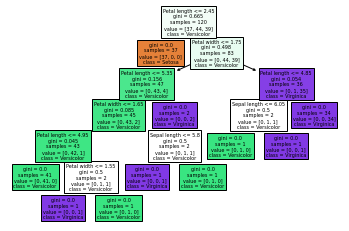

In [88]:
f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plot_tree(DTC,feature_names = f_n, class_names = c_n,filled = True)